# Part II - Flight performance in US
## by Neibo Augustine Olobo



## Investigation Overview


> The investigation's objective is to delve deeper into flight performance data in order to comprehend the fundamental causes of flight delays as well as the performance of the current carriers in terms of cancellations and delays.



## Dataset Overview

> The dataset is from Bureau of Transportation Statistics. It contains information about delays and cancellations for different carriers and destinations. This dataset has been retrieved from their official website in CSV format. The dataset has been retrieved for three years period, from 2005 to 2007.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#Read CSV files for years 2005,2006 and 2007 into individual dataframes
df_2007=pd.read_csv('2007.csv')
df_2006=pd.read_csv('2006.csv')
df_2005=pd.read_csv('2005.csv')
#concatenate all three dataframes and save into master df
df_data=pd.concat([df_2005,df_2006,df_2007])

In [3]:
#Changing column names to make it more meaningful and usable in later stages
df_data=df_data.rename(columns={'Year':'year','Month':'month','DayofMonth':'day_of_month','DayOfWeek':'day_of_week','DepTime':'departure_time','CRSDepTime':'crs_departure_time','ArrTime':'arrival_time','CRSArrTime':'crs_arrival_time','UniqueCarrier':'unique_carrier','FlightNum':'flight_number','TailNum':'tail_number','ActualElapsedTime':'actual_elapsed_time','CRSElapsedTime':'crs_elapsed_time','AirTime':'air_time','ArrDelay':'arrival_delay','DepDelay':'departure_delay','Origin':'origin','Dest':'destination','Distance':'distance','TaxiIn':'taxi_in','TaxiOut':'taxi_out','Cancelled':'cancelled','CancellationCode':'cancellation_code','Diverted':'diverted','CarrierDelay':'carrier_delay','WeatherDelay':'weather_delay','NASDelay':'nas_delay','SecurityDelay':'security_delay','LateAircraftDelay':'late_aircraft_delay'})

In [4]:
df_data.shape

(21735733, 29)

## What are the highest reasons for cancellation?
> Carrier and weather related cancellations are the highest.

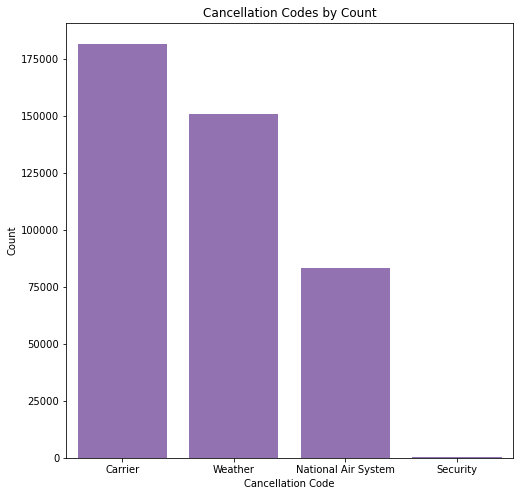

In [5]:
def chart_labels(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

#Getting distribution using Seaborn bar plot 

#Define Plot
plt.figure(figsize=(8,8))
base_color=sb.color_palette()[4]
g=sb.countplot(data=df_data,x='cancellation_code',color=base_color,order=['A','B','C','D'])
chart_labels('Cancellation Code','Count','Cancellation Codes by Count')
g.set_xticklabels(['Carrier','Weather','National Air System','Security']);

## Which carrier had the most cancellations?

> The plot above shows that MQ, AA, OO and DL are the top four carriers with highest cancellations.

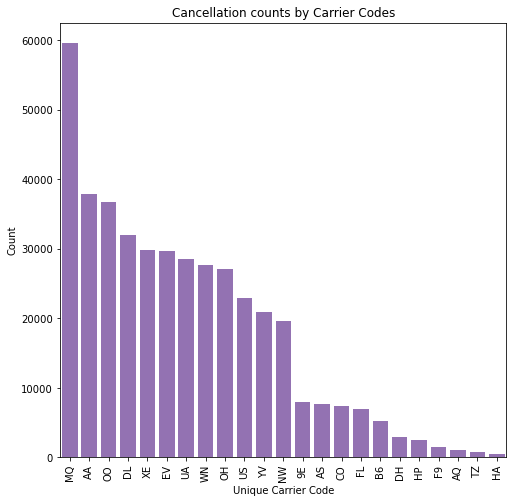

In [6]:
#Getting a subset of dataframe that contains only cancellation date
df_data_sub=df_data.query('cancellation_code in ["A","B","C","D"]')

#Getting distribution of carriers that had most cancellations

#Saving value counts for various carriers 
carriers_cancellations=df_data_sub.unique_carrier.value_counts()

base_color=sb.color_palette()[4]
plt.figure(figsize=(8,8))
plot=sb.countplot(data=df_data_sub,x='unique_carrier',color=base_color,order=carriers_cancellations.index)
plot.set_xticklabels(labels=carriers_cancellations.index,rotation=90)
chart_labels('Unique Carrier Code','Count','Cancellation counts by Carrier Codes')

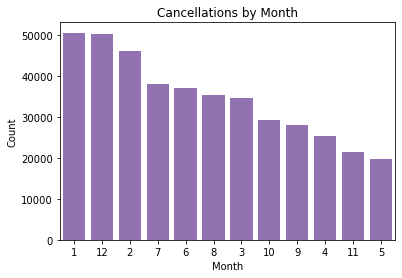

In [7]:
#Define Plot
month_counts=df_data_sub.month.value_counts()
sb.countplot(data=df_data_sub,x='month',color=base_color,order=month_counts.index)
chart_labels('Month','Count','Cancellations by Month');

## What does the distribution of departure delays look like?


> The histogram below shows the distribution of departure delays. From the graph, it can be observed that most of the delays are between 0 and 50. The graph is skewed to the right.

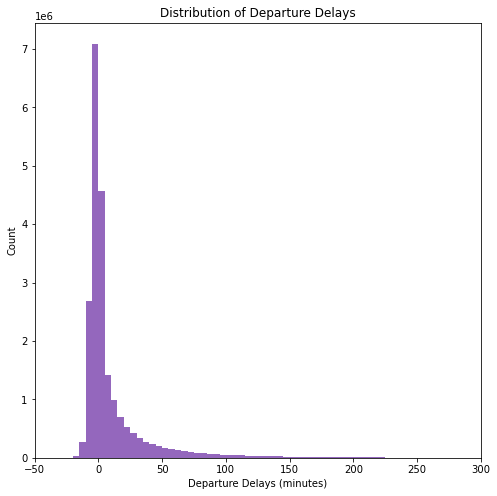

In [8]:
#Filtering only data with arrival_delay information, excluding NaN
df_departure_delay=df_data[df_data.departure_delay.notnull()]

#Define plot
plt.figure(figsize=(8,8))
bin_edges=np.arange(-50,300,5)
plt.hist(df_departure_delay.departure_delay,bins=bin_edges,color=base_color)
plt.xlim(-50,300)
chart_labels('Departure Delays (minutes)','Count','Distribution of Departure Delays')

## Conclusions



- American Airlines performed the worst in terms of both delays and cancellations.

- ATA Airlines and Northwest Airlines had the most percentage of their flights delayed from 2005-2007.

- Carrier and weather related cancellations were most common.

- Weather related delays were more significant as we saw in the comparison of delay reasons.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt